### Notebook: Análise Financeira e Operacional de Pedidos em Serviços de Food Delivery

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style="whitegrid")

In [2]:
# Carregamento dos dados
data_path = r"D:\Rafael Hessel\Documents\Ciencia de dados\Semestre 2\Projeto Aplicado 1\Workspace pycharm proj aplicado 1\food_orders_new_delhi (1).csv"

try:
    df = pd.read_csv(data_path)
    print("\u2705 Dados carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

✅ Dados carregados com sucesso!


In [3]:
# Visualizar as 5 primeiras linhas do dataframe
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
# Verificando valores ausentes
na_counts = df.isna().sum()
print("\nQuantidade de valores ausentes por coluna:")
print(na_counts)


Quantidade de valores ausentes por coluna:
Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64


In [6]:
# Estatísticas descritivas gerais (somente colunas numéricas)
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,500.50,1053.97,28.62,126.99,29.83,28.30
std,288.82,530.98,16.96,43.06,11.63,49.61
min,1.00,104.00,0.00,50.00,10.00,0.00
25%,250.75,597.75,20.00,90.00,20.00,0.00
50%,500.50,1038.50,30.00,127.00,30.00,0.00
75%,750.25,1494.00,40.00,164.00,40.00,50.00
max,1000.00,1995.00,50.00,200.00,50.00,150.00


In [7]:
# Estatísticas descritivas para colunas específicas
cols_financeiras = [
    "Order Value",
    "Delivery Fee",
    "Discounts and Offers",
    "Commission Fee",
    "Payment Processing Fee",
    "Refunds/Chargebacks"
]

df_fin = df[cols_financeiras]
df_fin.describe()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1053.97,28.62,126.99,29.83,28.30
std,530.98,16.96,43.06,11.63,49.61
min,104.00,0.00,50.00,10.00,0.00
25%,597.75,20.00,90.00,20.00,0.00
50%,1038.50,30.00,127.00,30.00,0.00
75%,1494.00,40.00,164.00,40.00,50.00
max,1995.00,50.00,200.00,50.00,150.00


In [8]:
def limpar_valores(col):
    return (
        col.astype(str)
        .str.replace('%', '', regex=False)
        .str.replace('Free Delivery', '0', case=False, regex=False)
        .str.replace('[^\d\.-]', '', regex=True)  # remove tudo que não for número, ponto ou hífen
        .replace('', np.nan)
        .astype(float)
    )

for col in cols_financeiras:
    df[col] = limpar_valores(df[col])

# Atualiza df_fin com os dados corrigidos
df_fin = df[cols_financeiras]


In [9]:
# Variância e Desvio Padrão
df_fin.var(), df_fin.std()

(Order Value              281934.81
 Delivery Fee                287.58
 Discounts and Offers        307.52
 Commission Fee             1854.51
 Payment Processing Fee      135.19
 Refunds/Chargebacks        2461.57
 dtype: float64,
 Order Value              530.98
 Delivery Fee              16.96
 Discounts and Offers      17.54
 Commission Fee            43.06
 Payment Processing Fee    11.63
 Refunds/Chargebacks       49.61
 dtype: float64)

In [10]:
# Verificar duplicatas
print("\nNúmero de linhas duplicadas:", df.duplicated().sum())


Número de linhas duplicadas: 0


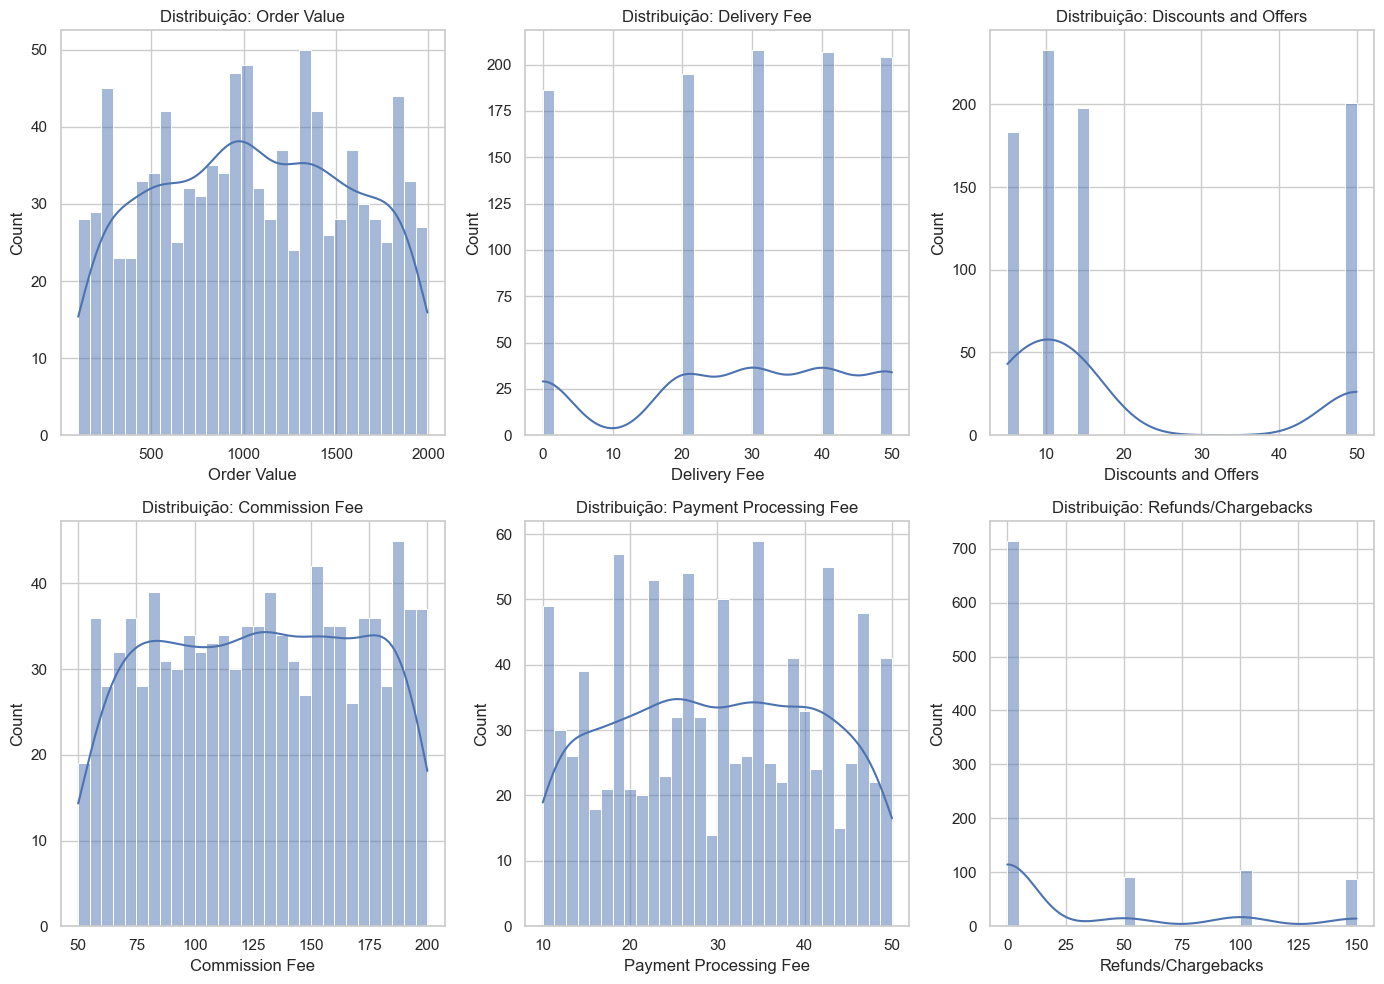

In [11]:
# Distribuição das variáveis numéricas
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_financeiras):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribuição: {col}')
plt.tight_layout()
plt.show()

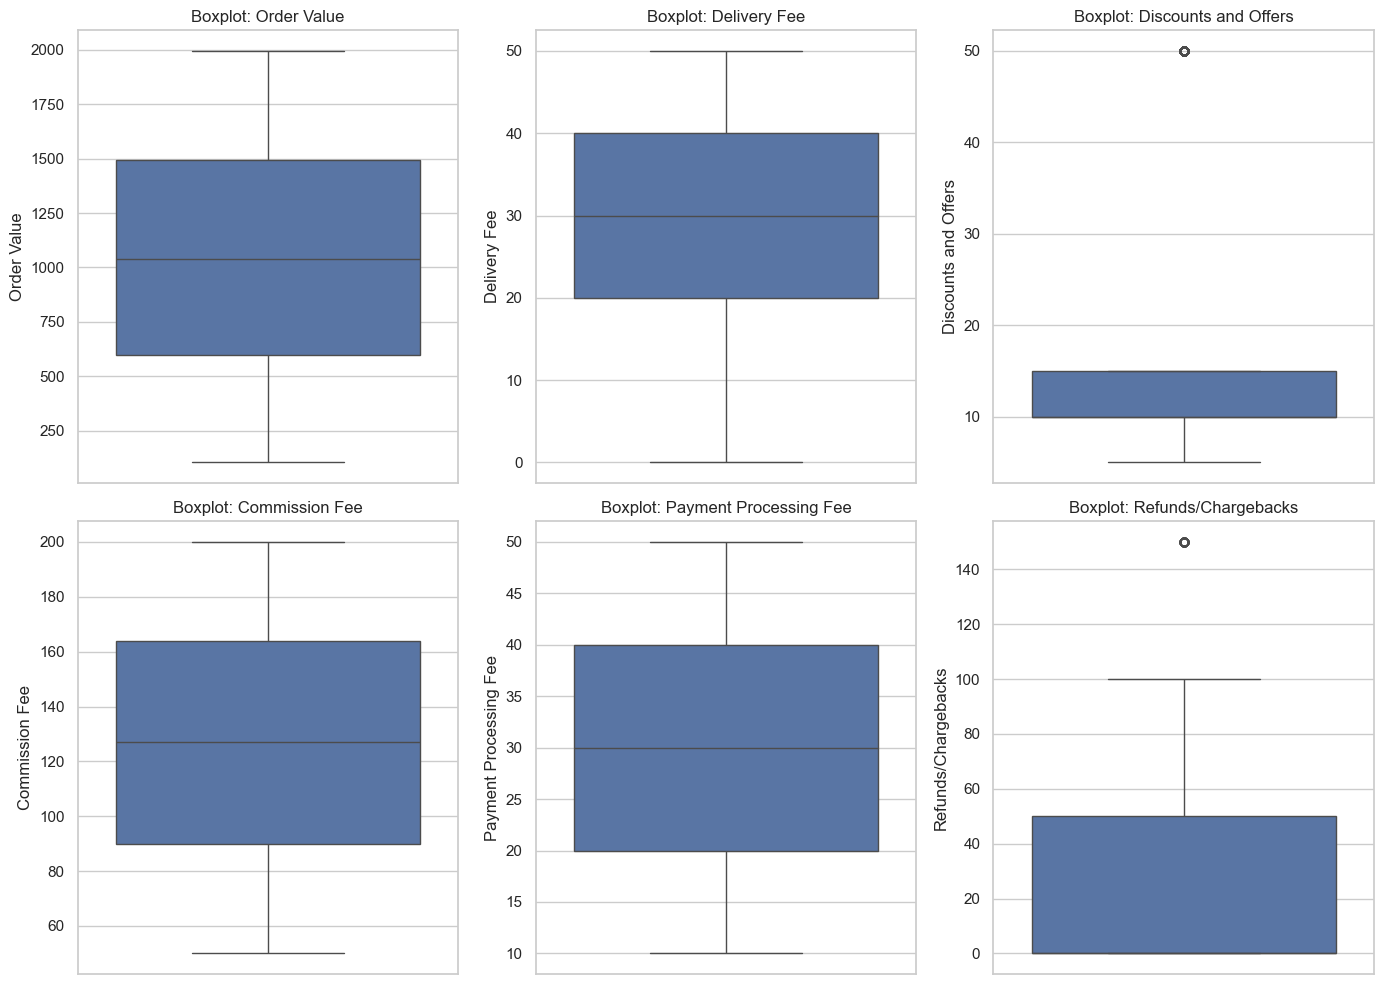

In [12]:
# Boxplots para análise de outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols_financeiras):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

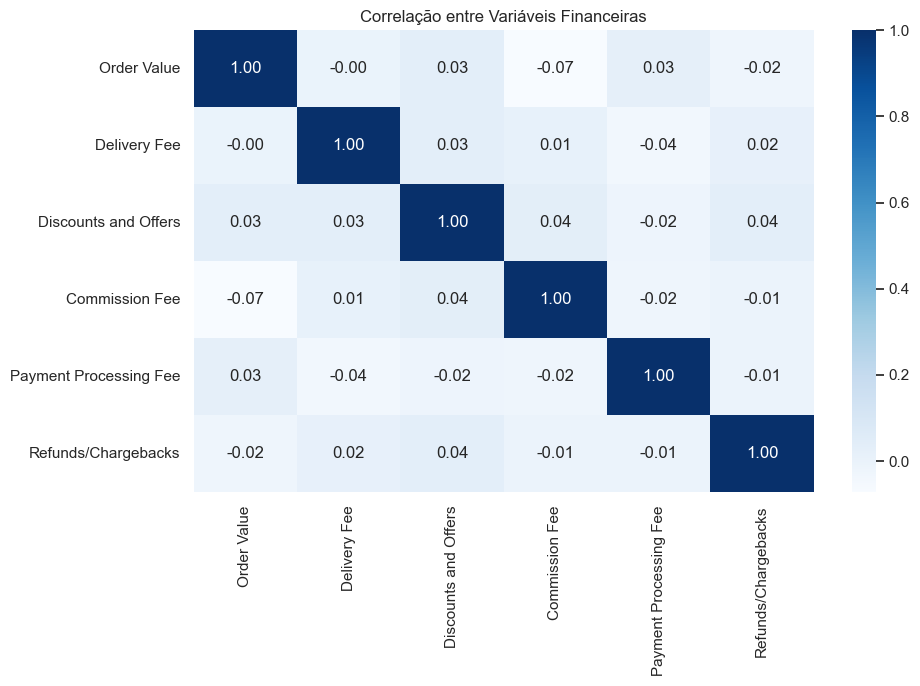

In [13]:
# Correlação entre as variáveis financeiras
corr = df_fin.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlação entre Variáveis Financeiras")
plt.show()

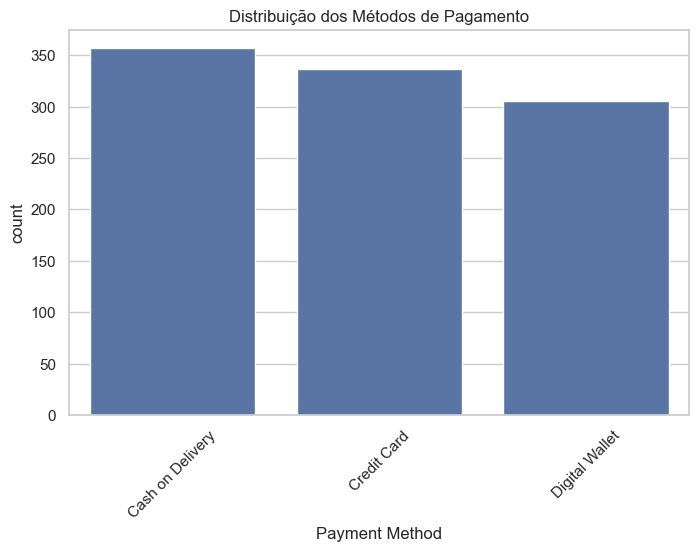

In [14]:
# Quantidade de pedidos por método de pagamento
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Payment Method", order=df["Payment Method"].value_counts().index)
plt.title("Distribuição dos Métodos de Pagamento")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Análise do tempo de entrega (tempo entre pedido e entrega)
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])
df["Delivery Date and Time"] = pd.to_datetime(df["Delivery Date and Time"])
df["Delivery Duration (min)"] = (df["Delivery Date and Time"] - df["Order Date and Time"]).dt.total_seconds() / 60

print("\nTempo médio de entrega (min):", df["Delivery Duration (min)"].mean())


Tempo médio de entrega (min): 73.575


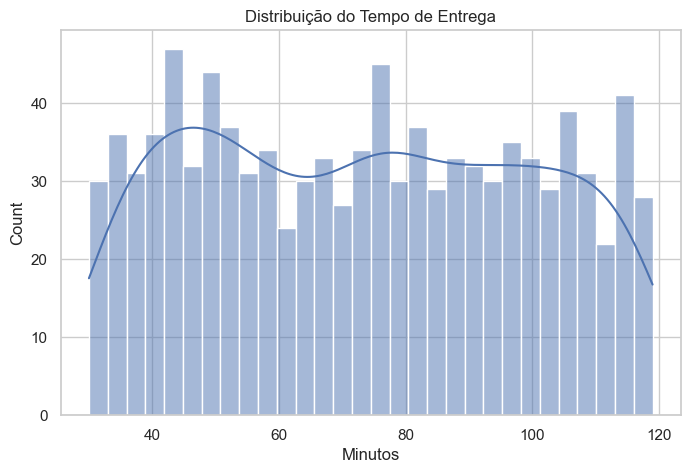

In [16]:
# Histograma do tempo de entrega
plt.figure(figsize=(8, 5))
sns.histplot(df["Delivery Duration (min)"], bins=30, kde=True)
plt.title("Distribuição do Tempo de Entrega")
plt.xlabel("Minutos")
plt.show()

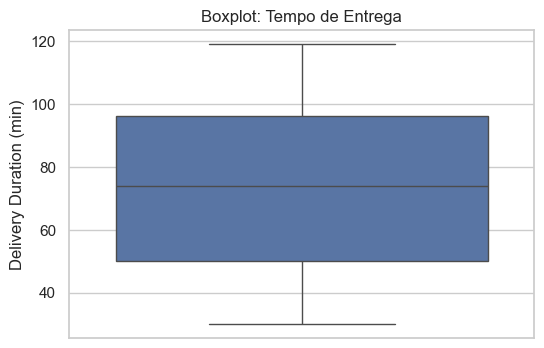

In [17]:
# Outliers no tempo de entrega
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y="Delivery Duration (min)")
plt.title("Boxplot: Tempo de Entrega")
plt.show()